In [1]:
from netpixi.integration.gt import Graph

g = Graph(directed=False)

In [2]:
import pandas as pd
import numpy as np

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [3]:
data = pd.read_csv("colaboration_comments.csv")

In [4]:
data

,COMMENT_ID,COMMIT_ID,URL,AUTHOR,CREATED_AT,BODY
0,22396772,47c1cd384b3deb0427e7e546e8d6b4346a65d816,https://github.com/selfhub/selfhub/pull/124#di...,zindlerb,2015-01-01T00:00:08Z,:sparkles: :pray: :sparkles:
1,22396775,a12155068a4feb03bf6b149b60830154ff52db0f,https://github.com/tsuru/tsuru/pull/1044#discu...,msabramo,2015-01-01T00:00:53Z,> Can you remove this empty line?\r\n\r\nDone.
2,9131174,f2c7da93b6607d2990335ad4c0b5f1b5c26f5a83,https://github.com/GoldenLions/GitHubScout/com...,myclamm,2015-01-01T00:00:55Z,Thanks man. That's from week 4 of Hack Reactor...
3,22396779,4c31e9b700de04c01f07c3f7d12afccbbf47237e,https://github.com/selfhub/selfhub/pull/125#di...,zindlerb,2015-01-01T00:01:44Z,"_.reduce would be more elegant, but your call"
4,22396780,2a0664c165aa3d1a4fec06d720d4ba393fefc7ae,https://github.com/emberjs/data/pull/2649#disc...,rwjblue,2015-01-01T00:01:54Z,Tiny nit-pick: can you name this something mea...
...,...,...,...,...,...,...
635297,9969493,d430ad5c96dc5a20ac90443cae1d534e21478c2d,https://github.com/AGV-IIT-KGP/git-sandbox/com...,rings360,2015-02-28T09:59:16Z,Asar Sunny <ring2rings93@gmail.com>
635298,9969494,3432d7bf3b10b57287979176ba569e414ad3af1e,https://github.com/veswill3/braintree-angular/...,jeffcarp,2015-02-28T09:59:16Z,Thank you for doing this! Would you mind if I ...
635299,25556037,062e3cb4c8aa6b3f2a8c338404bf699dfb8d2b6d,https://github.com/Robpol86/colorclass/pull/7#...,msabramo,2015-02-28T09:59:42Z,Done.
635300,25556038,062e3cb4c8aa6b3f2a8c338404bf699dfb8d2b6d,https://github.com/Robpol86/colorclass/pull/7#...,msabramo,2015-02-28T09:59:52Z,Done.


In [5]:
data['source'] = list(map(lambda x : x.split("https://github.com/")[-1].split('/')[0],data['URL']))

In [6]:
data = data.drop(['COMMIT_ID','COMMENT_ID','URL'],axis=1)

In [7]:
data

,AUTHOR,CREATED_AT,BODY,source
0,zindlerb,2015-01-01T00:00:08Z,:sparkles: :pray: :sparkles:,selfhub
1,msabramo,2015-01-01T00:00:53Z,> Can you remove this empty line?\r\n\r\nDone.,tsuru
2,myclamm,2015-01-01T00:00:55Z,Thanks man. That's from week 4 of Hack Reactor...,GoldenLions
3,zindlerb,2015-01-01T00:01:44Z,"_.reduce would be more elegant, but your call",selfhub
4,rwjblue,2015-01-01T00:01:54Z,Tiny nit-pick: can you name this something mea...,emberjs
...,...,...,...,...
635297,rings360,2015-02-28T09:59:16Z,Asar Sunny <ring2rings93@gmail.com>,AGV-IIT-KGP
635298,jeffcarp,2015-02-28T09:59:16Z,Thank you for doing this! Would you mind if I ...,veswill3
635299,msabramo,2015-02-28T09:59:42Z,Done.,Robpol86
635300,msabramo,2015-02-28T09:59:52Z,Done.,Robpol86


In [8]:
a = data.groupby(['source']).count()['AUTHOR'].sort_values(ascending=False)
b =a.mean()
c = a[a>b]
c.index

Index(['mozilla', 'aspnet', 'edx', 'apache', 'rust-lang',
       'GoogleCloudPlatform', 'caskdata', 'mozilla-b2g', 'Homebrew', 'NREL',
       ...
       'criteo-forks', 'raintank', 'runabove', 'leizongmin', 'Zeken',
       'garethr', 'TaiwanSparkUserGroup', 'jeffbcross', 'marco-c', 'tomekwi'],
      dtype='object', name='source', length=4929)

In [9]:
data_clean = data[data['source'].isin(c.index)]

In [10]:
data_clean

,AUTHOR,CREATED_AT,BODY,source
0,zindlerb,2015-01-01T00:00:08Z,:sparkles: :pray: :sparkles:,selfhub
1,msabramo,2015-01-01T00:00:53Z,> Can you remove this empty line?\r\n\r\nDone.,tsuru
3,zindlerb,2015-01-01T00:01:44Z,"_.reduce would be more elegant, but your call",selfhub
4,rwjblue,2015-01-01T00:01:54Z,Tiny nit-pick: can you name this something mea...,emberjs
5,bradenmacdonald,2015-01-01T00:02:33Z,"Yeah, I will just remove that. It is always True.",edx
...,...,...,...,...
635295,Zuhayr,2015-02-28T09:57:23Z,"Whoops, good call.",Baystation12
635296,XhmikosR,2015-02-28T09:58:15Z,@kasper93: are you sure [this](https://github....,kasper93
635297,rings360,2015-02-28T09:59:16Z,Asar Sunny <ring2rings93@gmail.com>,AGV-IIT-KGP
635299,msabramo,2015-02-28T09:59:42Z,Done.,Robpol86


In [11]:
data_clean.groupby(['source'])
lista = data_clean['AUTHOR'].value_counts().index.tolist()

In [12]:
n = data_clean.groupby('AUTHOR')['source'].apply(lambda x: list(np.unique(x)))
#g[g.columns['AUTHOR'] == 'houndci']
len(n.loc[n.index == 'houndci'][0])
#g.loc[g.str.contains('houndci')]

248

In [13]:
n = data_clean.groupby('AUTHOR')['source'].apply(lambda x: list(np.unique(x)))

In [33]:
same_repo_colab = data_clean.groupby('source')['AUTHOR'].apply(lambda x: list(np.unique(x)))

In [45]:
import itertools
import warnings
warnings.filterwarnings('ignore') 

for index, row in same_repo_colab.iteritems():
    pares = itertools.combinations(row, 2)
    for i,par in enumerate(pares):
        try:
            g.add_vertex(par[0])
        except Exception as inst:
            pass
        try:
            g.add_vertex(par[1])
        except Exception as inst:
            pass
        finally:
            try:
                g.add_edge(par[0],par[1])
            except:
                pass

In [46]:
n = g.num_vertices()
print('Número de vértices de g:', n)

Número de vértices de g: 27778


In [47]:
m = g.num_edges()
print('Número de arestas de g:', m)

Número de arestas de g: 626213


In [48]:
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

385794753

In [49]:
d = m / max_edges
d
print(f'Densidade é {d}')

Densidade é 0.0016231765598947894


In [50]:
import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *

In [51]:
data = gt_data(g)
data.head(5)

""
id
alexshalamov
chivakker
dawagner
jku
jlaako


In [52]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

In [53]:
data['degree'] = degrees
data.sort_values(by='degree',ascending=False).head(30)

,degree
id,
houndci,1211
GrahamCampbell,882
stof,811
pires,740
tamird,717
alexeagle,633
sindresorhus,627
huitseeker,615
catap,615


In [54]:
data['degree'].describe().to_frame()

,degree
count,27778.000000
mean,45.086975
std,76.232098
min,1.000000
25%,5.000000
50%,13.000000
75%,45.000000
max,1211.000000


<AxesSubplot: xlabel='degree', ylabel='Count'>

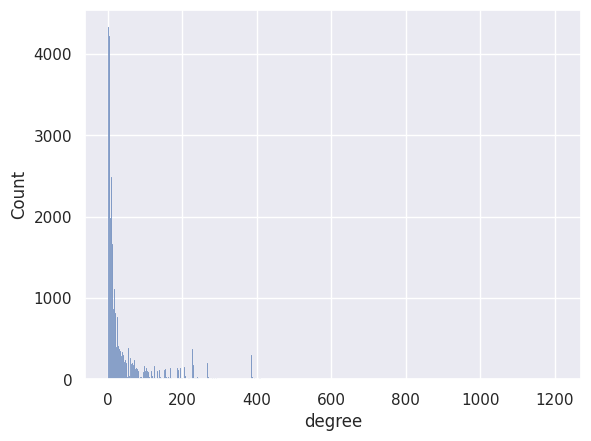

In [55]:
sns.histplot(data['degree'])

In [58]:
import netpixi

In [59]:
gt_save(g, 'colabs.net.gz')

In [60]:
g = gt_load('colabs.net.gz')

In [ ]:
r1 = netpixi.render('colabs.net.gz');

In [ ]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'colabs_sfdp.net.gz')
r2 = netpixi.render('colabs_sfdp.net.gz');

In [ ]:
#Ajustando propriedades
r2.vertex_default(size=5)
r2.edge_default( width=1)

<img src="colabs_sfdp.net.gz.png"/>